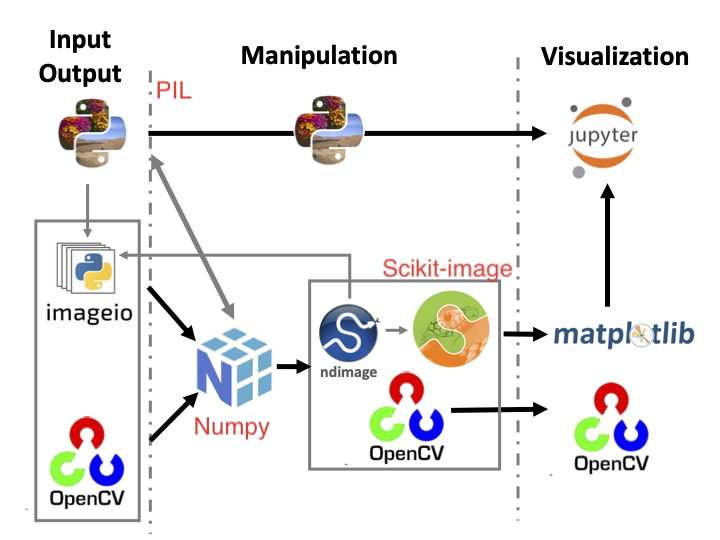

In [54]:
from IPython.display import Image
Image(r"./ImageProcessLibrary.png")

# Image
- To process images means that they are treated as **arrays**
- To show array as image, use ```matplotlib.pyplot.imshow```
- dType is generally ```uint8``` or ```float32```
- The images should be **THE SAME SIZE**
- 

# PIL(Python Image Library)
- Basic image preprocessor

uint8
float32


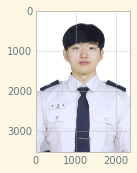

(40, 20, 3)


In [63]:
from PIL import Image
import numpy as np

im = Image.open('./yyr.jpg')

assert '__array__' in dir(im)
assert isinstance(im.__array__(), np.ndarray)

imArray = np.array(im)

# To show array as image
import matplotlib.pyplot as plt
plt.imshow(imArray)

# Shape is (height, width, channel)

partialIm = imArray[:, :, 0]
plt.imshow(partialIm)

# Checking dtype for performance
print(imArray.dtype) #uint8

# range conversion
conversedIm = imArray / 255
conversedIm = conversedIm.astype(np.float32)
print(conversedIm.dtype) # In image processing, generally used uint8 or float32 type, the loss is very small
plt.imshow(conversedIm)
plt.show()

# Resize and Crop
im3 = im.crop((0, 0, 20, 40)) # left, upper, right, lower
print(np.array(im3).shape)

im4 = im.resize((100, 100)) # width, height

# ImageIO
- Support most formats

# OpenCV
- Support less formats, **JPG** is best
- Support most functions
- Porting C to Python directly
- Read image like **BGR** order

In [4]:
!pip install -U opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.0/30.0 MB 31.9 MB/s eta 0:00:00m eta 0:00:010:00:01


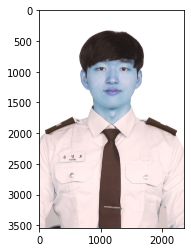

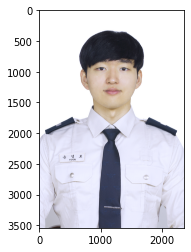

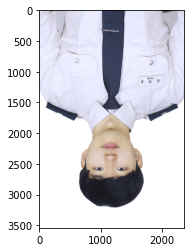

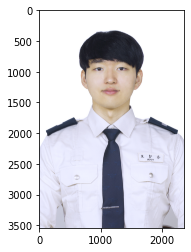

In [80]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('yyr.jpg')

# BGR order
plt.imshow(img)
plt.show()

# Convert to RGB order
plt.imshow(img[...,::-1])
# OR
# Innner mechanism is the split and concat in numpy
B, G, R = cv2.split(img)
im2 = cv2.merge((R, G, B))
plt.imshow(im2)
plt.show()

# Reverse
im3 = im2[::-1, ::-1, :]
plt.imshow(im3)
plt.show()


# Mirror
im4 = im2[:, ::-1, :] # Reverse x-axis
plt.imshow(im4)
plt.show()

# Scikit-image
- For expert, support variable functions

# Scipy Example

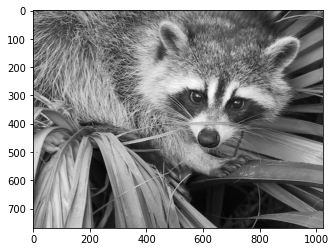

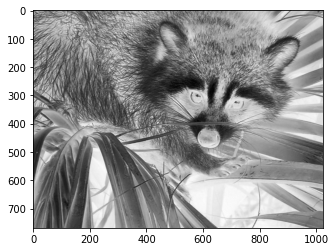

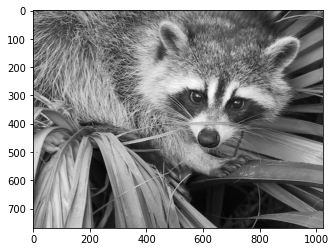

In [73]:
from scipy import misc
import numpy as np
import matplotlib.pyplot as plt

ex = misc.face(gray=True)
assert isinstance(ex, np.ndarray)
assert len(ex.shape) == 2 #Gray Scale (height, width)
assert ex.dtype == np.uint8 #0-255 intensity

# Change to 3D tensor
ex = ex[..., np.newaxis]
assert len(ex.shape) == 3

# Like nparray, the left-upper point is (0,0)
# Not Gray because matplotlib's problems
# If matplotlib draws 2D/3D image without color, gray-scale, paint default color without cmap

# Gray's cmap
plt.imshow(ex, cmap='gray') # lower is darker
plt.show()

plt.imshow(ex, cmap='binary') # lower is whiter
plt.show()

ex3 = ex.reshape(768, 1024, 1) # Reshape with one-channel, gray-scale
plt.imshow(ex3, cmap='gray')
plt.show()

# Tensorflow Examples

In [71]:
import tensorflow as tf

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
# First, Checking the demension
# See the number of square brakets or use .shape
print(X_train.shape) # 3D tensor, Gray-scale dataset (samples, height, width)
# Second, Checking the number of elements in each dimensions
# Use len(array) or array.shape
print(y_train.shape)

# Reshape image with channel
# CNN receive 4D tensor
# X_train = X_train.reshape((60000, 28, 28, 1))
# X_test = X_test.reshape((10000, 28, 28, 1))
# OR
X_train = X_train[..., tf.newaxis]
X_test = X_test[..., tf.newaxis]

(60000, 28, 28)
(60000,)


# Monkey Patch
- By importing submodules, the base modules can be **EXPANDED**
- And because Matplotlib's state machine selects the context automatically, draw matplotlib in the same cell

## Matplotlib's Draws

### State Machine
https://python-3-patterns-idioms-test.readthedocs.io/en/latest/StateMachine.html

- Applied in the current context without assigning variables
  - The context is choosen in the same cell and the closest context

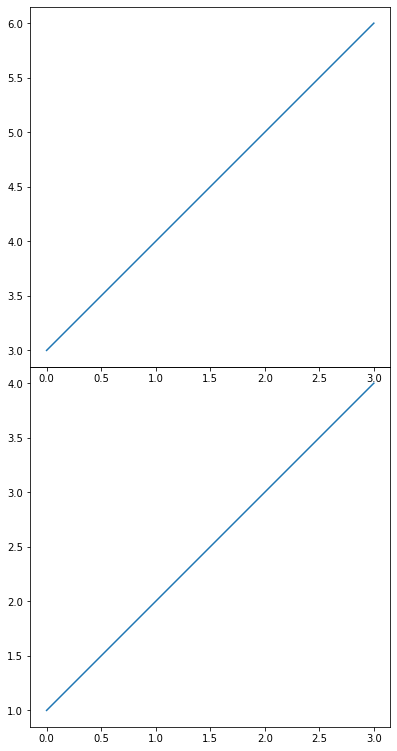

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.axes((0, 0, .5, .5)) # Left, Botton, Width, Height
plt.plot([1,2,3,4]) # Without choosing a canvas, the current context is selected automatically
plt.axes((0, .5, .5, .5))
plt.plot([3,4,5,6])
plt.show()

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


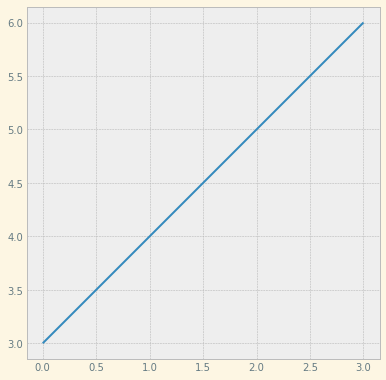

In [15]:
# Make a global status
import matplotlib.pyplot as plt
print(plt.style.available)
plt.style.use('bmh')
plt.figure(figsize=(5,5))
plt.plot([3,4,5,6])

### OOP

### SM + OOP

In [1]:
# Kernel restart -> start this
import matplotlib

print(len(dir(matplotlib)))

108


In [2]:
import matplotlib.pyplot as plt
print(len(dir(matplotlib)))

156


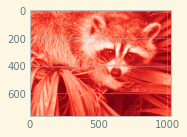

In [19]:
# Since importing "cm", matplotlib is expanded
from matplotlib import cm
from scipy import misc

ex = misc.face(gray=False)
plt.imshow(ex[...,0], cmap=cm.Reds_r)

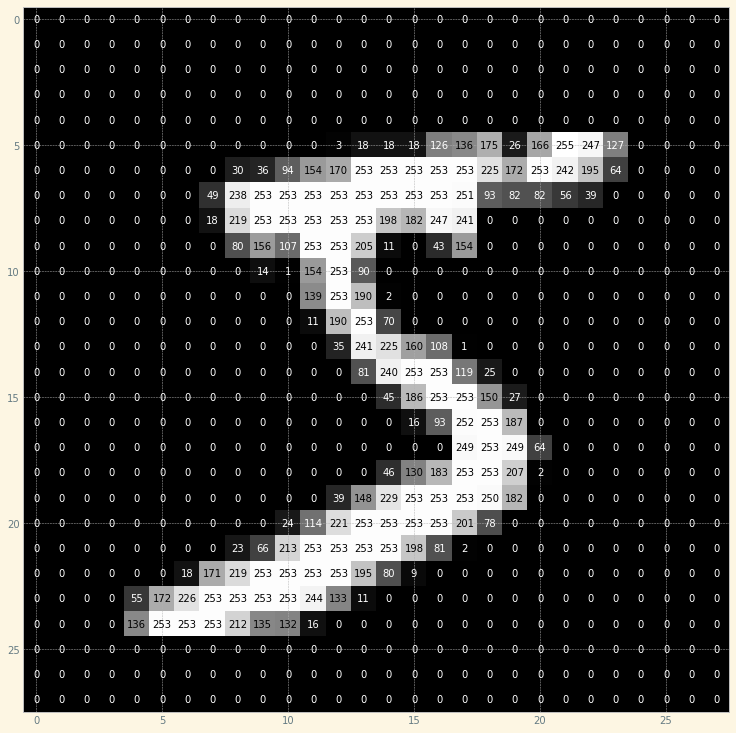

In [27]:
# Show image as numbers
import tensorflow as tf
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

img = X_train[0]
plt.figure(figsize=(10,10))
plt.imshow(img, cmap='gray')
h,w= img.shape
threshold = img.max() / 2
for y in range(h):
    for x in range(w):
        plt.annotate(str(img[y,x]), (x,y),
                    horizontalalignment='center',
                    verticalalignment='center',
                    color='white' if img[y,x] < threshold else 'black') # color is the "annotation" color

## The condition of structured data
### **IID**
- Each columns of Dataset must be independent

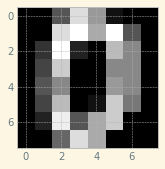

In [47]:
from sklearn.datasets import load_digits

data = load_digits(return_X_y = True, as_frame=True)

# The format is same as Structured data. 
# But, the IID condition isn't fulfilled since the each position of pixel isn't independent
data[0]

import matplotlib.pyplot as plt
img = data[0]
img = img.iloc[0].values.reshape(8,8)
plt.imshow(img, cmap='gray')

## Convert image to the structured data(just treated by structural)
- To use ML/DL, fit the images as same size and format
- As converting it, **can apply KNN, Logistic, etc**
  - But, the hypothesis isn't fulfilled, the performance is worse

### Technique

#### Tranditional ML
- Resize, Crop: Normalize size
- EDA: Erase correlation

- The goal of Tranditional ML is to find ```Feature```


#### Morden ML(AutoEncoder, W2V, CNN, RNN)
- Doesn't matter the **IID condition**
- The importance of image processings is lower since DL is done automatically
  - Using **CNN**, the image processing just does data augmentations
  - The dataset is much more required
  